# Bspline

### Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import AppLayout, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
from scipy import integrate
import itertools 
import time

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 39390 bytes to pyBspline.py


In [2]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Dominio 1D

## Codominio 1D

### Funzioni di base

In [25]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=8 #base caridnality
xmin = 0
xmax = N-P
v0 = np.linspace(xmin,xmax,N+P-3)
#print(v)
v = [0,0] + list(v0) + [max(v0),max(v0)] #np.arange(0,P+N+1)
# Bernstein
#v = list(np.full(P+1,xmin))+list(np.full(P+1,xmax))
#N=P+1
print(v)
kv = Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0, 0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 6.0]
polinomial degree :  2
base caridnality  :  8
knots             :  [0. 0. 0. 1. 2. 3. 4. 5. 6. 6. 6.]


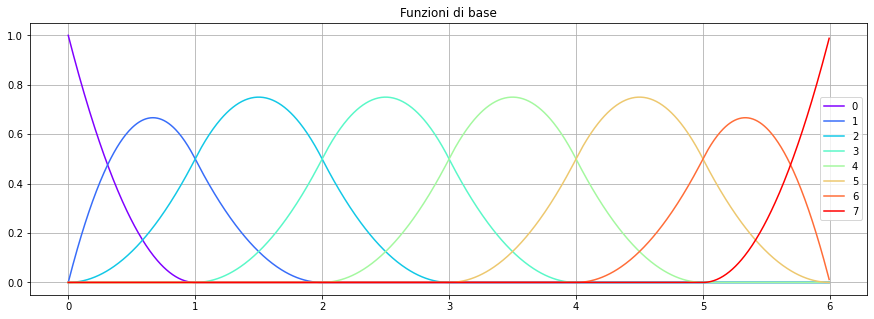

In [26]:
#grafico le funzioni di base
x = np.linspace(min(v),max(v),1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    #print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.title("Funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

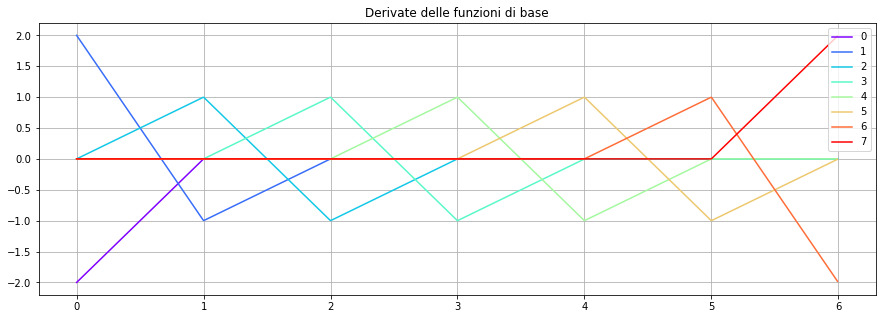

In [27]:
#grafico le funzioni derivate di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

der = bs.derivative()

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.title("Derivate delle funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

## Approssimazione: 1D $\rightarrow$ 1D

In [28]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=12 #base caridnality
xmin = 0.
xmax = 10.
v = np.linspace(xmin,xmax,N+P-3)
#print(v)
v = [0,0] + list(v) + [10,10] #np.arange(0,P+N+1)
#print(v)
#print(v)
kv = Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  12
knots             :  [ 0.  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 10. 10.]


In [51]:
#function
def func(x):
    return np.sin(2*np.pi*x/5) #+ np.power(x,5.0)#np.full(len(x),1.0)     

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [52]:
#fitting_Bspline
def fitting_Bspline(x,*par):
    #bs.clear_cp()
    for i in range(len(par)):
        bs.set_cp(i,par[i])
    return bs.evaluate(x)        

In [53]:
#x,y
x = np.linspace(xmin,xmax,100,endpoint=False)
y = func(x)

In [54]:
#fit
p0 = list ( np.zeros(N))
popt,pcov = curve_fit(fitting_Bspline,x,y,p0=p0)
#print(popt)

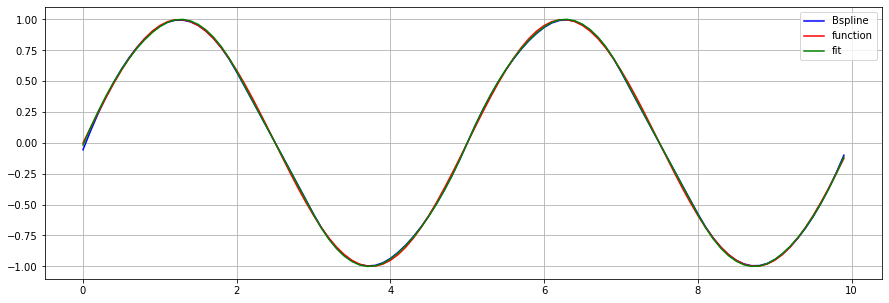

In [55]:
#grafico
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

bs.approximate(func,opts={"N":[100]})
yb = bs.evaluate(x)
yf = func(x)

for i in range(len(popt)):
    bs.set_cp(i,popt[i])
yfit = bs.evaluate(x)
    
plt.plot(x, yb  , color= "blue"  ,label="Bspline")
plt.plot(x, yf  , color= "red"   , label="function")
plt.plot(x, yfit, color= "green" , label="fit")
    
plt.legend()
plt.grid(True)
plt.show()

## Codominio 2D

### Curva in 2D

In [81]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=20 #base caridnality
#
v0 = np.linspace(0,1,N+P-3)
v  = [0,0] + list(v0) + [1,1]
#

#
kv = Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])


polinomial degree :  2
base caridnality  :  20
knots             :  [0.         0.         0.         0.05555556 0.11111111 0.16666667
 0.22222222 0.27777778 0.33333333 0.38888889 0.44444444 0.5
 0.55555556 0.61111111 0.66666667 0.72222222 0.77777778 0.83333333
 0.88888889 0.94444444 1.         1.         1.        ]


In [82]:
def func(t):
    #print(cpz)
    a = 20
    cpx = t#np.random.rand(N)
    cpy = np.cos(a*t)/2.0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [84]:
cp = bs.approximate(func,opts={"delta":[100]})
cpx = cp[0]
cpy = cp[1]

In [113]:
#grafico le funzioni di base
NN = 1000
t= np.linspace(min(v0),max(v0),NN)

#
xy   = bs.evaluate(t)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

#
xy = func(t)
df0 = pd.DataFrame(xy)
df0 = df0.rename(columns={0:"x",1:"y"})

index = 800
der = bs.derivative()
arrow = der.evaluate(t[index])[0]

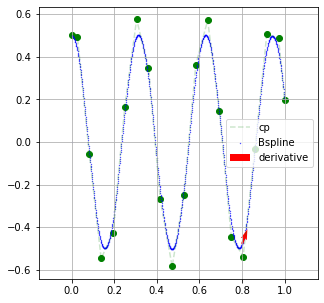

In [116]:
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.2)
plt.scatter(cpx,cpy,color="green")
plt.scatter(df["x"], df["y"], color= "blue",label="Bspline",s=0.1)
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
plt.quiver( *list(df.iloc[index]) , *arrow ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

## Codominio 3D

### Curva in 3D

In [273]:
#definisco la dimensionaità:
sh = Bs.shape(1,3)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=20 #base caridnality
#
xmin = 0.0
xmax = 1.0
v0 = np.linspace(0,1,N+P-3)#[ 0,1,2,3,4,5]
v  = [0,0] + list(v0) + [1,1]#[-2,-1,0,1,2,3,4,5,6,7]
#print(v0)
#print(v)

#
kv = Bs.knot_vector(P,N,v)
kv.show()
#cpz = np.linspace(0.,1.,N)#np.random.rand(N)
#cpx = np.sin(100*cpz)#np.random.rand(N)
#cpy = np.cos(100*cpz)#np.random.rand(N)


#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  20
knots             :  [0.         0.         0.         0.05555556 0.11111111 0.16666667
 0.22222222 0.27777778 0.33333333 0.38888889 0.44444444 0.5
 0.55555556 0.61111111 0.66666667 0.72222222 0.77777778 0.83333333
 0.88888889 0.94444444 1.         1.         1.        ]


In [274]:
def func(t):
    cpz = t#np.random.rand(N)
    #print(cpz)
    a = 20
    cpx = np.sin(a*t)#np.random.rand(N)
    cpy = np.cos(a*t)#np.random.rand(N)
    out = np.zeros(shape=(len(t),3))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
        out[i,2] = cpz[i]
    return out

In [275]:
#
cp = bs.approximate(func,opts={"delta":[100]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]
#cp

In [276]:
#
NN = 1000
t = np.linspace(0.,1.,NN,endpoint=False)

In [277]:
#
xyz = func(t)
df0 = pd.DataFrame(xyz)
df0 = df0.rename(columns={0:"x",1:"y",2:"z"})
df0["x0"] = t
#df0

In [320]:
#
xyz = bs.evaluate(t)
df = pd.DataFrame(xyz)
df = df.rename(columns={0:"x",1:"y",2:"z"})
#df["x0"] = t
#df

In [321]:
index = 100
der = bs.derivative()
arrow = der.evaluate(t[index])[0]

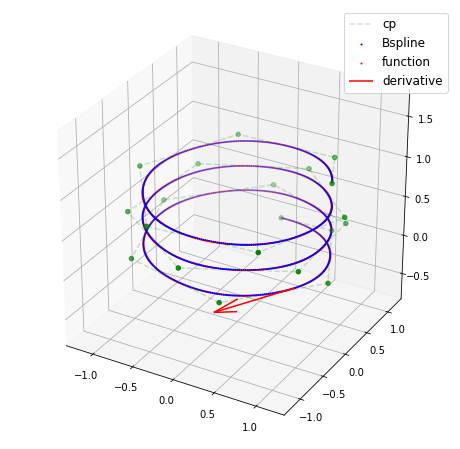

In [322]:
fig = plt.figure ( 0 , figsize=(8,8) )    
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
#plt.plot(pyx, pyy, pyz)

#converto in dataframe    
X = [df.loc[N,"x"] ,df.loc[N,"y"] , df.loc[N,"z"]]
ax.plot(cpx,cpy,cpz,color="green",label="cp",linestyle="--",alpha=0.2)
ax.scatter(cpx,cpy,cpz,color="green",marker='o')
ax.scatter(df["x"], df["y"],df["z"], color= "blue",label="Bspline",s=1)
ax.scatter(df0["x"],df0["y"],df0["z"], color= "red",label="function",s=1)
plt.quiver( *list(df.iloc[index]) , *arrow  , \
               normalize=True,label="derivative",color="red")

plt.legend(fontsize=12)
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
#plt.axis('equal')
set_axes_equal(ax)
plt.show()

# Dominio 2D

## Codominio 1D

### Funzioni di base in 2D

In [33]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [0]#[-2, -1]
right = [2]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
#print("v0 :", v0)
#print("v  :", v)
#print("N  :", N)
#print("L  :", L)
#print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0. 0. 1. 2. 2.]


In [34]:
#grafico le funzioni di base
Nx = 40
Ny = 40
x = np.linspace(min(v),max(v),Nx,endpoint=False)
y = np.linspace(min(v),max(v),Ny,endpoint=False)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

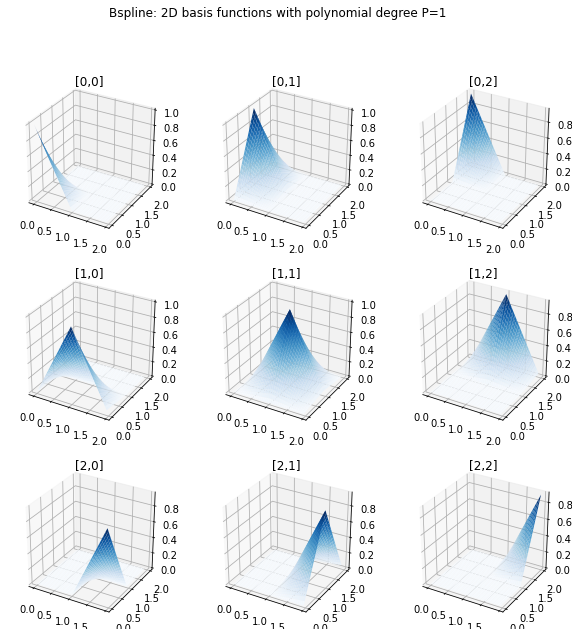

In [35]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

treD = True

k=1
for i in range(L,R):
    for j in range(L,R):
        #print(k)
        if treD == True :
            ax = fig.add_subplot(NP, NP, k, projection='3d')
        else :
            ax = fig.add_subplot(NP, NP, k)#, projection='3d')
        k=k+1
        
        #
        bs.clear_cp()
        bs.set_cp([i,j],1.0)
        #
        z=bs.evaluate(XY) 
        Z=z.reshape(Nx,Ny)
        #        
        if treD == True :
            ax.plot_surface(X, Y, Z, cmap='Blues')
        else :
            ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
        
        title = "[%d,%d]"%(i,j)
        ax.set_title(title)
        #plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [41]:
#%matplotlib widget
i = 1
j = 1

#
bs.clear_cp()
bs.set_cp([i,j],1.0)
#
z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
#        
der = bs.derivative()
vx = der[0].evaluate(XY)#.reshape((Nx,Ny))
vy = der[1].evaluate(XY)#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

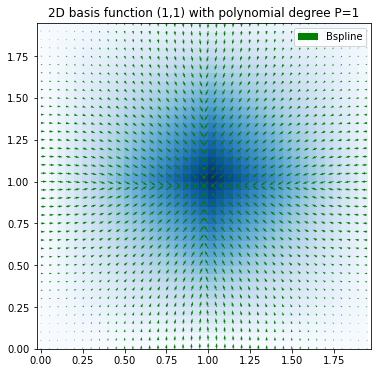

In [42]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )

#
plt.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")
plt.quiver(XY[:,0],XY[:,1],vx,vy,color="green",label="Bspline")
plt.axis('equal')
plt.legend()
plt.title("2D basis function (%d,%d) with polynomial degree P=%d" %(i,j,P) )
plt.show()

## Codominio 3D

### Sphere

In [26]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=10 #base caridnality
umin = 0
umax = 2*np.pi
u = np.linspace(umin,umax,Nx+Px-1)

#y
Py=1 #polinomial degree
Ny=6 #base caridnality
vmin = 0#-1
vmax = np.pi#1
v = np.linspace(vmin,vmax,Ny+Py-1)

#print(v)
ux = [-0.1] + list(u) + [2*np.pi+0.1]
vy = [-0.1] + list(v) + [np.pi+0.1]

#
kvx = Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [27]:
#sfera
def Sphere(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = np.sin(v)*np.cos(u)#(1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = np.sin(v)*np.sin(u)#(1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = np.cos(v)#v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [28]:
#approximate
cp = bs.approximate(Sphere,opts={"delta":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [30]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Sphere(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [31]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

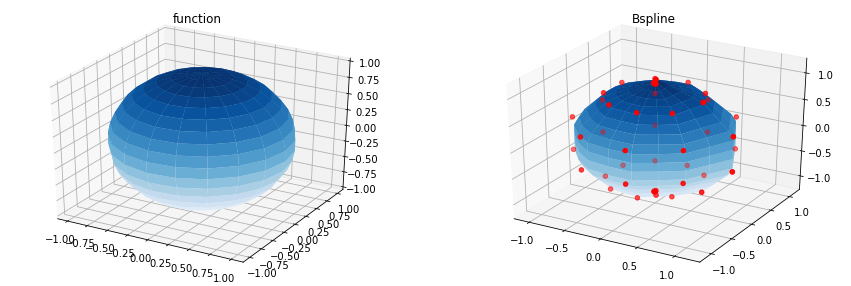

In [32]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
set_axes_equal(ax)
#plt.axis('equal')
plt.show()

### Moebius

In [52]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=20 #base cardinality
umin = 0
umax = 2*np.pi
u = np.linspace(umin,umax,Nx+Px-1)

#y
Py=1 #polinomial degree
Ny=5 #base caridnality
vmin = -1
vmax = 1
v = np.linspace(vmin,vmax,Ny+Py-1)

#print(v)
ux = [-0.1] + list(u) + [2*np.pi+0.1]
vy = [-1.1] + list(v) + [1.1]

#
kvx = Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [53]:
#Moebius
def Moebius(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = (1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = (1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [54]:
#approximate
cp = bs.approximate(Moebius,opts={"delta":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [55]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Moebius(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [56]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

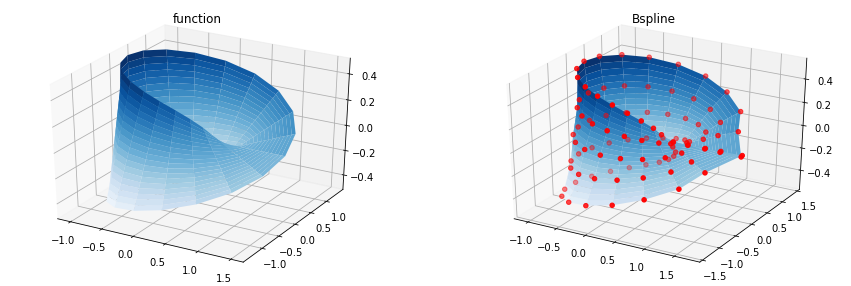

In [59]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")
#set_axes_equal(ax)

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
#set_axes_equal(ax)
#plt.axis('equal')
plt.show()

## Approssimazione: 2D $\rightarrow$  1D

In [35]:
#definisco la dimensionaità:
sh = Bs.shape(2,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=6 #base caridnality
xmin = 0.
xmax = 1.
v = np.linspace(xmin,xmax,N+P-3)
#print(v)
v = [0,0] + list(v) + [1,1] #np.arange(0,P+N+1)
#print(v)
#print(v)
kv = Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

polinomial degree :  2
base caridnality  :  6
knots             :  [0.   0.   0.   0.25 0.5  0.75 1.   1.   1.  ]


In [36]:
#funzione
def func(xy):
    #(x, y) = xy
    return np.cos(2*np.pi*xy[:,0]) + np.sin(2*np.pi*xy[:,1]) #+ np.power(x,5.0)#np.full(len(x),1.0)     

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [37]:
#fitting_Bspline
il = bs.index_list()

def fitting_Bspline(xy,*par):
    #bs.clear_cp()
    #(x, y) = xy
    for i,j in zip(il,range(len(par))):
        bs.set_cp(i,par[j])
    return bs.evaluate(xy)        

In [38]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = func(XY)
Z = z.reshape(Nx,Ny)

In [32]:
# fit
p0 = list ( np.zeros(N**2))
popt,pcov = curve_fit(fitting_Bspline,XY,z,p0=p0)
#print(popt)
# control points
for i,j in zip(il,range(len(popt))):
        bs.set_cp(i,popt[j])
zF = bs.evaluate(XY)
ZF=zF.reshape(Nx,Ny)

In [39]:
# approssimazione
bs.approximate(func)
zB = bs.evaluate(XY)
ZB=zB.reshape(Nx,Ny)

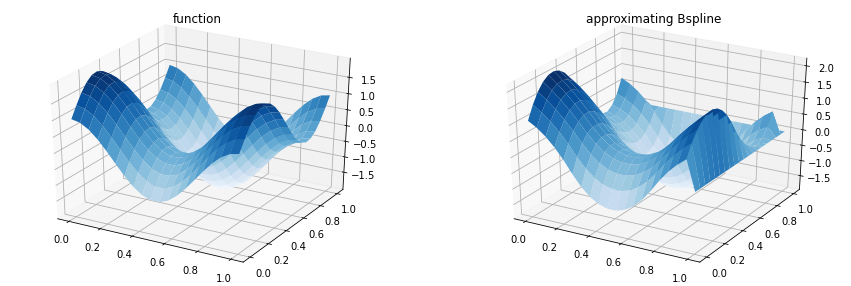

In [41]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues')
ax.set_title("approximating Bspline")

#ax = fig.add_subplot(133 , projection='3d')      
#ax.plot_surface(X, Y, ZF, cmap='Blues')
#ax.set_title("fit")

plt.show()

# Dominio 3D

## Codominio 1D

### Funzioni di base

In [89]:
#definisco la dimensionaità:
sh = Bs.shape(3, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
#N0 = 4
N = 3  #base caridnality
#
#xmin = 0.0
#xmax = 2.0
#v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
#left = [0]#[-2, -1]
#right = [2]#[6, 7]
v = [0,0,1,2,2]#list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
#N = len(v) - P - 1

#
#ll = len(left)
#lr = len(right)
#lv = len(v0)
#L  = 0#ll
#R  = N#ll+N#ll + lv
#NP = N#R-L

#
#print("v0 :", v0)
#print("v  :", v)
#print("N  :", N)
#print("L  :", L)
#print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0 0 1 2 2]


In [90]:
#grafico le funzioni di base
Nx = 10
Ny = 10
Nz = 10
Nxyz  = Nx*Ny*Nz
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
z = np.linspace(min(v),max(v),Nz,endpoint=True)
X, Y , Z = np.meshgrid(x, y, z)
XYZ = np.zeros((Nxyz,3))
XYZ[:,0] = X.reshape((Nxyz,))
XYZ[:,1] = Y.reshape((Nxyz,))
XYZ[:,2] = Z.reshape((Nxyz,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

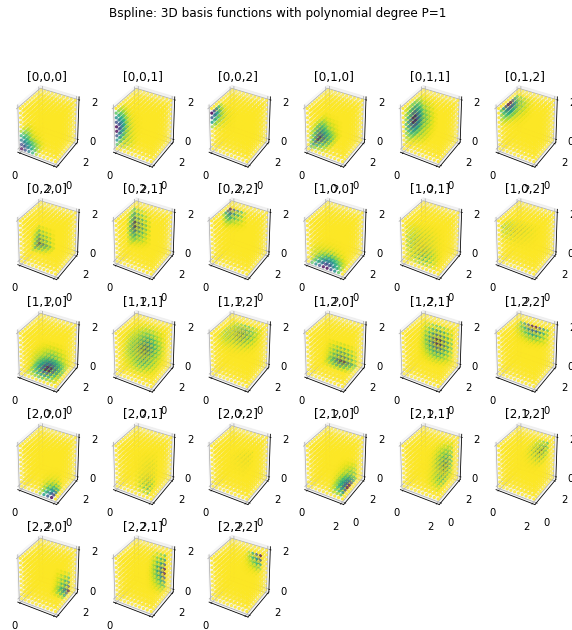

In [91]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 3D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

cmap = plt.get_cmap('viridis_r')

k=1
for i in range(0,N):
    for j in range(0,N):
        for w in range(0,N):
            #print(k)
            ax = fig.add_subplot(5,6,k, projection='3d')
            k=k+1

            #
            bs.clear_cp()
            bs.set_cp([i,j,w],1.0)
            #
            t=bs.evaluate(XYZ) 
           
            #
            norm = Normalize(vmin=min(t), vmax=max(t))
            ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
            title = "[%d,%d,%d]"%(i,j,w)
            ax.set_title(title)
            #        
            #ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
            #plt.axis('equal')
            #ax.set_zlim(0,1.2)
            #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [97]:
#%matplotlib widget
i = 0
j = 0
k = 0

#
bs.clear_cp()
bs.set_cp([i,j,k],1.0)
#
t=bs.evaluate(XYZ) 
Z=t.reshape(Nx,Ny,Nz)
#        
normalize = 10 
der = bs.derivative()
vx = der[0].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vy = der[1].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vz = der[2].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

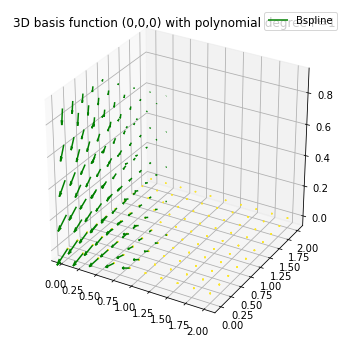

In [99]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )
ax = fig.add_subplot(111, projection='3d')
#
t=bs.evaluate(XYZ)            
#
norm = Normalize(vmin=min(t), vmax=max(t))
plt.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
plt.quiver(XYZ[:,0],XYZ[:,1],XYZ[:,2],vx,vy,vz,color="green",label="Bspline")
#ax.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")

#plt.axis('equal')
plt.legend()
plt.title("3D basis function (%d,%d,%d) with polynomial degree P=%d" %(i,j,k,P) )
plt.show()